<div style="text-align:center">
    <span style=" color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px; font-weight:bold;">Data Science Project</span>
</div>


<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">imports: </span>
</div>


In [1]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd
import numpy as np
import seaborn as sns
import re
import time 
import os  
import bs4
from bs4 import BeautifulSoup
import itertools
import scipy as sc
import csv
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn import metrics
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import requests
from matplotlib.colors import ListedColormap
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from selenium.webdriver.chrome.options import Options
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression


<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">Beginning of the proccess. </span>
</div>

<hr>

<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">Creating new dataframe </span>
</div>



<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">
 Neighborhoods: </span>
</div>


+ Used ChatGPT to gather all neighborhoods in Los-Angeles to avoid data limit in homes.com
+ Creating a new column 'Done' incase cralwer failed we can continue from the place it stopped



In [ ]:
neighborhoods = ["Angelino-Heights", "Arleta", "Arlington-Heights", "Arts-District", "Atwater-Village", "Beachwood-Canyon", "Bel-Air", "Benedict-Canyon",
                "Beverly-Crest", "Beverly-Glen", "Beverly-Grove", "Beverly-Hills", "Beverly-Park", "Beverlywood", "Boyle-Heights", "Brentwood",
                "Brookside", "Bunker-Hill", "Cahuenga-Pass", "Canoga-Park", "Carthay", "Central-Alameda", "Century-City", "Chatsworth",
                "Cheviot-Hills", "Chinatown", "Civic-Center", "Crenshaw", "Crestview", "Cypress-Park", "Del-Rey", "Downtown", "Eagle-Rock",
                "East-Hollywood", "Echo-Park", "El-Sereno", "Elysian-Park", "Elysian-Valley", "Encino", "Exposition-Park", "Faircrest-Heights",
                "Fairfax", "Fashion-District", "Filipinotown", "Financial-District", "Florence", "Flower-District", "Franklin-Hills", "Gallery-Row",
                "Glassell-Park", "Gramercy-Park", "Granada-Hills", "Green-Meadows", "Griffith-Park", "Hancock-Park", "Harbor-City", "Harbor-Gateway",
                "Harvard-Heights", "Harvard-Park", "Hermon", "Highland-Park", "Historic-Core", "Hollywood", "Hollywood-Dell", "Hollywood-Hills",
                "Hollywood-Hills-West", "Holmby-Hills", "Hyde-Park", "Jefferson-Park", "Jewelry-District", "Kinney-Heights", "Koreatown",
                "Lafayette-Square", "Lake-Balboa", "Lake-View-Terrace", "Larchmont", "Laurel-Canyon", "Leimert-Park", "Lincoln-Heights",
                "Little-Armenia", "Little-Ethiopia", "Little-Tokyo", "Longwood-Highlands", "Los-Feliz", "Manchester-Square", "Mandeville-Canyon",
                "Mar-Vista", "Marina-Peninsula", "Melrose", "Mid-City", "Mid-Wilshire", "Miracle-Mile", "Mission-Hills", "Montecito-Heights",
                "Monterey-Hills", "Mount-Olympus", "Mount-Washington", "North-Hills", "North-Hollywood", "Northridge", "Pacific-Palisades",
                "Pacoima", "Palisades-Highlands", "Palms", "Panorama-City", "Park-La-Brea", "Pico-Robertson", "Pico-Union", "Playa-del-Rey",
                "Playa-Vista", "Porter-Ranch", "Rancho-Park", "Regent-Square", "Reseda", "Reynier-Village", "San-Pedro", "Sawtelle",
                "Shadow-Hills", "Sherman-Oaks", "Silver-Lake", "South-Central", "South-Park", "South-Robertson", "South-Los-Angeles",
                "Studio-City", "Sun-Valley", "Sunland", "Sylmar", "Tarzana", "Thai-Town", "Toluca-Lake", "Toluca-Terrace", "Toluca-Woods",
                "Tujunga", "University-Hills", "University-Park", "Valley-Glen", "Valley-Village", "Van-Nuys", "Venice", "Vermont-Knolls",
                "Vermont-Square", "Vermont-Vista", "Vernon", "Victoria-Park", "View-Heights", "Watts", "Wellington-Square", "West-Adams",
                "Westchester", "West-Hills", "Westlake", "West-Los-Angeles", "Westwood", "Westwood-Village", "Wholesale-District",
                "Wilmington", "Wilshire-Center", "Winnetka", "Woodland-Hills"]

nh_df = pd.DataFrame({'Neighborhood' :neighborhoods})
nh_df['Done'] = '0'
df_to_scan = nh_df.loc[nh_df['Done'] == 0] 

nh_df = pd.DataFrame({'Neighborhood' :neighborhoods})
nh_df['Done'] = '0'
df_to_scan = nh_df.loc[nh_df['Done'] == 0] 


---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">Listing Link Crawler:</span>
</div>

<hr>

<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;"> This crawler exctracting all links from a location provided </span>
</div>
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">Steps:</span>
</div>

+ Exctracting how many pages and how many links per page are there.
+ Running through all links table and exctracting links into a csv and moving to next page
+ When this session crawler is finished, it's creating a new csv file with the neighborhood name and appending all links

In [ ]:
def linker(name):
    # Set up the web driver
    browser = webdriver.Chrome()
    
    output_directory = r'C:\Users\shushu\Data Science Project\Links'
    filename = f'{name}.csv'
    file_path = os.path.join(output_directory, filename)

    # Set up the CSV file
    csv_file = open(file_path, 'w', newline='', encoding='utf-8')
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['Link', 'isDone'])

    # Navigate to the website
    url = f'https://www.homes.com/{name}-ca/sold/p1/'
    browser.get(url)
    time.sleep(3)
    print("Scraping ", name)
    # Get the total number of pages
    soup = BeautifulSoup(browser.page_source, 'html.parser')
    page_range = soup.find('p', class_='search-results').find('span', class_='pageRange').text

    # Extract the total number of pages
    total_pages = int(page_range.split(' of ')[1])
    print("Number of Pages:", total_pages)
    print("Extracting ....")
    # Scrape data from each page
    for page in range(1, total_pages+1):
        browser.get(f'https://www.homes.com/{name}-ca/sold/p{page}/')
        # Wait for the page to load
        time.sleep(3)
    
        # Find all the house listings
        listings = browser.find_elements(By.XPATH, '//li[contains(@class, "placard-container")]/article[contains(@class, "search-placard sold-placard")]')
        number_of_listings = len(listings)
        # Get the links for each house listing
        for listing in listings:
            link_element = listing.find_element(By.XPATH, './/div[@class="sold-content-container"]/a')
            link = link_element.get_attribute('href')
            csv_writer.writerow([link, '0'])
            

---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">Run the cell below only if <u>Listing Link</u> crawler failed.</span>
</div>

+ Uploading Neighborhood into a dataframe and then updating 'Done' information into df_to_scan 

In [ ]:
nh_df = pd.read_csv('Neighborhood.csv')
df_to_scan = nh_df.loc[nh_df['Done'] == 0] 
# Creating a new dataframe that will look only on all rows that weren't scraped.


---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">Starting linker crawler:</span>
</div>

<hr>

<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:26px; font-family:ASSISTANT; padding: 5px;"> Running only on column 'Done' == 0  </span>
</div>

+ Running on every row of the dataframe to exctract information with "linker" method.

In [ ]:
for row in df_to_scan.itertuples(index=True): # Running on a new dataframe that only has '0' in 'Done' column
    linker(row.Neighborhood) ## row.Neighborhood extracting every neighborhood name and applying into linker.
    print('\n')
    nh_df.iloc[row.Index, 1] = 1 # set "Scanned" as 1
    nh_df.to_csv('Neighborhood.csv', index=False) # Every successful scraping, updating the csv file for 'Done' == 1


---

---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">Gathering information into one file</span>
</div>
+ Running on every row of the dataframe to exctract information with "linker" method.

<hr>

<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:26px; font-family:ASSISTANT; padding: 5px;"> Creating a new list to store all of the single dataframes </span>
</div>


+ Uploading all neighborhoods links 
+ Appending each neighborhood dataframe into the list
+ Using 'concat' function to connect all of the Dataframes from the list into one big dataframe.

In [ ]:
NH_links = []  # Initialazie an empty list to store the Dataframes for each file

fpath = r'C:\Users\shushu\Data Science Project\Links'

for filename in os.listdir(fpath):
    file_path = os.path.join(fpath, filename)
    df = pd.read_csv(file_path)
    
    file_name = os.path.splitext(filename)[0]
    df['Neighborhood'] = file_name
    
    NH_links.append(df)

NH_links = pd.concat(NH_links, ignore_index=True)
NH_links =  NH_links.reindex(columns=['Neighborhood', 'Link', 'isDone'])
links_df_isDone_scan = NH_links.loc[NH_links['isDone'] == 0] 



---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;"><b>Data Acquisition Crawler :</b></span>
</div>
<hr>

+ Uploading all neighborhoods links 
+ Appending each neighborhood dataframe into the list
+ Using 'concat' function to connect all of the Dataframes from the list into one big dataframe.

<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:26px; font-family:ASSISTANT; padding: 5px;"> This crawler acquiring multiple data on each one of the listings in the dataframe. </span>
</div>


#### Steps:
+ Extracting listing link from a specific Neighborhood
+ Running through multiple tables and gathering important information such as:
+ House size, Lot size, Rooms, Bathrooms, Garage, Parking slots etc...


<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:26px; font-family:ASSISTANT; padding: 5px;"> Run the cell below only if <u>Data Acquisition</u> crawler failed </span>
</div>

+ Uploading Neighborhoods links into a dataframe and then updating 'isDone' information into links_df_to_scan 

In [ ]:
#NH_links.to_csv('Neighborhood Links.csv', index=False)
csv_file.close()
NH_links = pd.read_csv('Neighborhood Links.csv')
links_df_isDone_scan = NH_links.loc[NH_links['isDone'] == 0]
# Creating a new dataframe that will look only on all rows that weren't scraped ('isDone' = 0).


---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:26px; font-family:ASSISTANT; padding: 5px;">Starting Data Acquisition crawler: </span>
</div>



---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:26px; font-family:ASSISTANT; padding: 5px;">Setting csv file </span>
</div>

---

In [ ]:
# Set up the CSV file
#csv_file = open('house_data.csv', 'w', newline='', encoding='utf-8')
#csv_writer = csv.writer(csv_file)
#csv_writer.writerow(['Neighborhood','Adress','Price', 'Rooms', 'Baths', 'Sq Ft', 'Sq Ft Lot', 'Year Built', 'Structure Type',
                     #'View', 'Fire Place', 'Levels', 'Attached Garage', 'Total Parking Space', 'Pool'])

#csv_file.close()

---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:26px; font-family:ASSISTANT; padding: 5px;">Runner: </span>
</div>

---
+ Running only on values 'isDone' = 0 Incase crawler is failed.
+ Running on every row of the dataframe to exctract information with "Data Acquisition" method.

In [ ]:
# Create ChromeOptions instance
chrome_options = Options()
# Set the desired page load strategy
chrome_options.page_load_strategy = 'none'  # Use 'eager', 'normal', or 'complete' as per your requirement
# Set up the web driver with the configured options
browser = webdriver.Chrome(options=chrome_options)

csv_file = open('house_data.csv', 'a', newline='', encoding='utf-8')
csv_writer = csv.writer(csv_file)

print("Scraped row number: ")
# Iterate over the rows of the dataframe
for i, row in links_df_isDone_scan.iterrows():
    link = row['Link'].strip()
    neighborhood = row['Neighborhood'].strip()
    browser.get(link)
    #time.sleep(1)
        # Get the details of the house
    house_soup = BeautifulSoup(browser.page_source, 'html.parser')

    price_element = house_soup.find('span', class_='property-info-price')
    price = price_element.text.strip() if price_element is not None else 'N/A'
      
        # Extract the address
    address_element = house_soup.find('h1', class_='property-info-address-main')
    address = address_element.text.strip() if address_element is not None else 'N/A'
    
    info_elements = house_soup.find_all('span', class_='property-info-feature-detail')

    if len(info_elements) >= 3:
        beds, baths, sqft, sqft_lot = info_elements[:4]
        beds = beds.text.strip()
        baths = baths.text.strip()
        sqft = sqft.text.strip()
        sqft_lot = sqft_lot.text.strip()
    else:
        beds = 'N/A'
        baths = 'N/A'
        sqft = 'N/A'
        sqft_lot = 'N/A'
        
    # Locate the amenities container
    amenities_container = house_soup.find('section', id='amenities-container')
    
    if amenities_container is not None:
         # Extract specific details
        structure_type_element = amenities_container.find('span', text='Structure Type:')
        structure_type = structure_type_element.find_next_sibling('span').text.strip() if structure_type_element is not None else 'N/A'

        year_built_element = amenities_container.find('span', text='Year Built: ')
        year_built = year_built_element.find_next_sibling('span').text.strip() if year_built_element is not None else 'N/A'

        structure_type_element = amenities_container.find('span', text='Structure Type: ')
        structure_type = structure_type_element.find_next_sibling('span').text.strip() if structure_type_element is not None else 'N/A'

        view_element = amenities_container.find('span', text='View: ')
        view = view_element.find_next_sibling('span').text.strip() if view_element is not None else 'N/A'
        
        # Find the "Interior Features" category
        interior_features_category = amenities_container.find('p', text='Interior Features')
        # Find the "Garage/Parking" category
        garage_parking_category = amenities_container.find('p', text='Garage/Parking')
        # Find the "Exterior Features" category
        exterior_features_category = amenities_container.find('p', text='Exterior Features')
    
    else:
        structure_type ='N/A'
        year_built ='N/A'
        structure_type ='N/A'
        view ='N/A'
    if interior_features_category is not None:
        fireplace_element = interior_features_category.find_next('span', text='Fireplace: ')
        fireplace = fireplace_element.find_next_sibling('span').text.strip() if fireplace_element is not None else 'N/A'
        levels_element = interior_features_category.find_next('span', text='Levels: ')
        levels = levels_element.find_next_sibling('span').text.strip() if levels_element is not None else 'N/A'
    else: 
        fireplace = 'N/A'
        levels = 'N/A'  
    if garage_parking_category is not None:
        attached_garage_element = garage_parking_category.find_next('span', text='Attached Garage: ')
        attached_garage = attached_garage_element.find_next_sibling('span').text.strip() if attached_garage_element is not None else 'N/A'
        total_parking_spaces_element = garage_parking_category.find_next('span', text='Total Parking Spaces: ')
        total_parking_spaces = total_parking_spaces_element.find_next_sibling('span').text.strip() if total_parking_spaces_element is not None else 'N/A'
    else:
        attached_garage = 'N/A'
        total_parking_spaces = 'N/A'

    if exterior_features_category is not None:
        pool_private_element = exterior_features_category.find_next('span', text='Pool Private: ')
        pool_private = pool_private_element.find_next_sibling('span').text.strip() if pool_private_element is not None else 'N/A'
    else : 
        pool_private = 'N/A'
        
    csv_writer.writerow([neighborhood, address, price, beds, baths, sqft, sqft_lot, year_built, structure_type, view, fireplace,
                             levels, attached_garage, total_parking_spaces, pool_private])
        
    NH_links.loc[row.name, 'isDone'] = 1  # set "isDone" as 1
    NH_links.to_csv('Neighborhood Links.csv', index=False)
        # Print the progress
    print(i, end=' ')

# Close the CSV file and browser
print(f"You can switch to a CSV file")
csv_file.close()
browser.quit()


---
---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">Data-Cleaning Section.</span>
</div>



---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">Proccessing</span>
</div>

+ We will now examine the quantities of each type and then categorize the necessary records into binary and categorical.

In [114]:
df = pd.read_csv('house_data_uncleaned.csv')
df

,Neighborhood,Adress,Price,Rooms,Baths,Sq Ft,Sq Ft Lot,Year Built,View,Fire Place,Levels,Attached Garage,Total Parking Space,Pool
0,Angelino-Heights,605 N Bushnell Ave,"$1,288,200",4,3,"1,635","7,405",1906.0,No,No,Two,NaN,NaN,No
1,Angelino-Heights,232 La Follette Dr,"$1,300,000",3,2,"1,531","4,356",1940.0,Yes,Yes,One,Yes,2.0,No
2,Angelino-Heights,1162 Montecito Dr,"$1,071,000",2,1,984,"8,276",1963.0,Yes,No,One,Yes,1.0,No
3,Angelino-Heights,1645 Vine St Unit 302,"$865,000",1,2,"1,720","$2,084/mo",1928.0,Yes,No,One,No,2.0,No
4,Angelino-Heights,343 Pioneer Dr Unit 205,"$750,000",2,2,"1,443","$1,051/mo",1988.0,Yes,No,One,NaN,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48580,Woodland-Hills,22945 Stagg St,"$865,000",3,2,"1,631","7,405",1959.0,No,Yes,One,Yes,2.0,No
48581,Woodland-Hills,7009 Oakdale Ave,"$852,000",3,4,"1,800","7,841",1953.0,No,Yes,One,Yes,4.0,No
48582,Woodland-Hills,20327 Saticoy St Unit 206,"$385,000",2,2,870,$258/mo,1978.0,No,No,One,NaN,2.0,Yes
48583,Woodland-Hills,24241 Kittridge St,"$794,250",4,2,"1,570","7,841",1960.0,Yes,Yes,One,Yes,2.0,No



---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;"> Removing Duplicates</span>
</div>

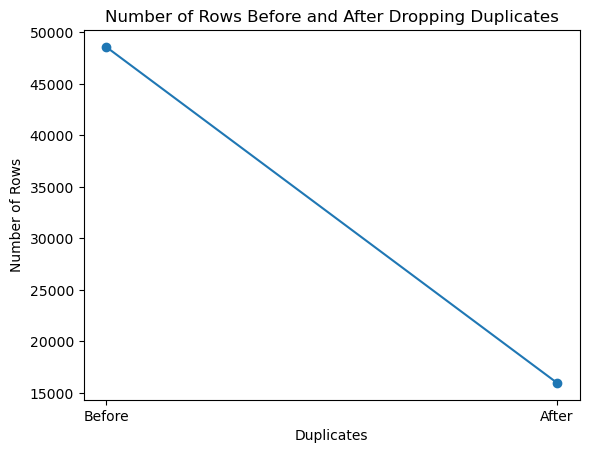

,Neighborhood,Adress,Price,Rooms,Baths,Sq Ft,Sq Ft Lot,Year Built,View,Fire Place,Levels,Attached Garage,Total Parking Space,Pool
0,Angelino-Heights,1037 Buena Vista St,"$3,175,000",3,2,"2,022",0.36,1949.0,No,Yes,Two,Yes,5.0,Yes
1,Angelino-Heights,3526 Lowell Ave,"$868,000",3,2,"1,564","5,227",1938.0,Yes,Yes,One,NaN,NaN,No
2,Angelino-Heights,713 Harding Ave,"$690,000",2,1,770,"5,663",1954.0,Yes,Yes,One,No,2.0,No
3,Angelino-Heights,2167 Broadview Ter,"$1,344,000",3,3,"1,497","2,614",1941.0,Yes,No,Three Or More,No,2.0,No
4,Angelino-Heights,2229 W 78th St,"$890,000",3,2,"1,625","6,534",1925.0,Yes,Yes,One,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15955,Woodland-Hills,27353 Park Vista Rd,"$1,550,000",5,3,"3,244","7,841",NaN,"Hills View, Mountain View",Yes,NaN,NaN,3.0,No
15956,Woodland-Hills,24703 Avenida Asoleada,"$2,650,000",5,4,"3,233","10,019",1987.0,Yes,Yes,Two,Yes,3.0,Yes
15957,Woodland-Hills,4004 Black Bird Way,"$1,579,000",4,4,"3,422","5,663",1989.0,Yes,Yes,Two,Yes,3.0,No
15958,Woodland-Hills,23611 Ladrillo St,"$1,265,000",4,3,"2,436",0.26,1961.0,No,Yes,One,Yes,2.0,Yes


In [115]:
subset_cols = ['Adress', 'Price', 'Sq Ft'] 
# We will now delete duplicates based on few columns information - because there might be an apartment listed on the same address.
rows_before = len(df)
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)
df_sorted = df_shuffled.sort_values(by='Neighborhood').reset_index(drop=True)
df = df_sorted.drop_duplicates(subset=subset_cols, keep='first').reset_index(drop=True)
rows_after = len(df)

#Matplot showing the difference

x, y = ['Before', 'After'] , [rows_before, rows_after]
plt.plot(x, y, marker='o')
plt.xlabel('Duplicates')
plt.ylabel('Number of Rows')
plt.title('Number of Rows Before and After Dropping Duplicates')
plt.show()

df

## After removing duplicates and figured that almost 3x times were duped we understood that alot of the house's neighborhoods were sharing the same radius therfor when we scraped for different neighborhoods we gathered alot of the same houses with the same



---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">  Changing all NaN values and removing Imporant NaN informations</span>
</div>

+ We know that if in one of these 5 categories below there is a 'NaN', that means there is no Pool, View, Fire Place etc. we will replace as '0'

+ If Levels category is 'NaN' meaning there are no other floors so it's only 1 floor, we will replace as '1'

+ Some addresses are null so we decided to remove them.

In [116]:
columns_to_replace = ['View', 'Fire Place', 'Attached Garage', 'Total Parking Space', 'Pool']
df[columns_to_replace] = df[columns_to_replace].fillna(0)
df['Levels'] = df['Levels'].fillna(1)
df.replace('--', np.nan, inplace=True)
print(df['Adress'].isnull().sum())
df.dropna(subset=['Adress'], inplace=True)

22


In [117]:
print(df['View'].value_counts())
print(df['Fire Place'].value_counts())
print(df['Levels'].value_counts())


No                                                       6166
Yes                                                      6084
0                                                        1131
Tree Top                                                  235
City                                                      118
                                                         ... 
Forest, Hills, Mountains, Mt Tamalpais, Ridge, Valley       1
Canyon, Hills, Valley                                       1
Hills, Mountains, Ridge                                     1
Hills, Ridge                                                1
Trees/Woods, Pool, Green Belt                               1
Name: View, Length: 911, dtype: int64
Yes                                                 8306
No                                                  4460
0                                                   2907
Living Room                                           37
Woodstove                                           


---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;"> Mapping:</span>
</div>

+ We have many non numeric values so we will map them as 'No' = 0 , 'Yes' = 1 etc ..

+ As mentiond above, we know that if there are values in View, Fire Place that means there is one, we will configure as '1'

In [118]:
for column in df.columns:
    df[column] = df[column].replace({'No': 0, 'Yes': 1})  


df['Levels'] = df['Levels'].replace({'One': 1, 'Two': 2, 'Three Or More': 3, 'Multi/Split': 2, 'One, Two': 2,'Two, Three Or More':3 , 'Multi/Split, One': 2, "One, Three Or More":1, "One, Multi/Split":1,"Three Or More, Multi/Split":2,"Two, Multi/Split":2, "Multi/Split, Three Or More":2, "One, Three Or More, Multi/Split":1, "One, Two, Multi/Split": 1, "Multi/Split, Two":2 })


col_replace = ['View', 'Fire Place']
# Apply the conversion function to the DataFrame
df[col_replace] = df[col_replace].replace(to_replace=r'.*', value=1, regex=True)


### As we can see above more configuring needs to be made

+ Remove strings such as dollar sign, commas 
+ We know that in column 'Sq Ft Lot' if value is "number/mo" meaning it's an appartment. we will create 2 new columns to manipulate



In [119]:
#Searching for appartment patterns and making changes.
pattern = r'^\$\d{1,3}(?:,\d{3})*(?:\.\d+)?/mo$' # appartments patterns
apartments = df['Sq Ft Lot'].astype(str).str.match(pattern)# searching which lines are appartments based on pattern
df.loc[apartments, 'Sq Ft Lot'] = df.loc[apartments, 'Sq Ft'] # Finding where is 'pattern' and changing to sqftlot = sqft
df['Apartment'] = apartments.astype(int) #  Creating new column, if apartment = 1, else = 0 
df['House'] = (~apartments).astype(int)# Creating new column, if house = 1, else = 0


# Updating information to numeric
df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')
df[['Sq Ft', 'Sq Ft Lot']] = df[['Sq Ft', 'Sq Ft Lot']].astype(str).apply(lambda x: x.str.replace(',', ''))


new_order = ['Neighborhood', 'Adress', 'Apartment','House','Price', 'Rooms', 'Baths', 'Sq Ft', 'Sq Ft Lot', 'Year Built', 'View', 'Fire Place', 'Levels', 'Attached Garage', 'Total Parking Space', 'Pool']
df = df.reindex(columns=new_order)


# Convert 'Sq Ft Lot' column from acres to square feet
df['Sq Ft Lot'] = pd.to_numeric(df['Sq Ft Lot'], errors='coerce')
df.loc[df['Sq Ft Lot'] < 100, 'Sq Ft Lot'] *= 43560


coltonum = ['Apartment', 'House', 'Price', 'Rooms', 'Baths', 'Sq Ft', 'Sq Ft Lot','Levels', 'Year Built', 'Total Parking Space']
for col in coltonum:
    df[col] = pd.to_numeric(df[col], errors='coerce')


C:\Users\leana\AppData\Local\Temp\ipykernel_23936\639557128.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '').str.replace(',', '')


#### Great!  most of our data is non-null.

In [120]:
df

,Neighborhood,Adress,Apartment,House,Price,Rooms,Baths,Sq Ft,Sq Ft Lot,Year Built,View,Fire Place,Levels,Attached Garage,Total Parking Space,Pool
0,Angelino-Heights,1037 Buena Vista St,0,1,3175000.0,3.0,2.0,2022.0,15681.6,1949.0,0,1,2,1,5.0,1
1,Angelino-Heights,3526 Lowell Ave,0,1,868000.0,3.0,2.0,1564.0,5227.0,1938.0,1,1,1,0,0.0,0
2,Angelino-Heights,713 Harding Ave,0,1,690000.0,2.0,1.0,770.0,5663.0,1954.0,1,1,1,0,2.0,0
3,Angelino-Heights,2167 Broadview Ter,0,1,1344000.0,3.0,3.0,1497.0,2614.0,1941.0,1,0,3,0,2.0,0
4,Angelino-Heights,2229 W 78th St,0,1,890000.0,3.0,2.0,1625.0,6534.0,1925.0,1,1,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15955,Woodland-Hills,27353 Park Vista Rd,0,1,1550000.0,5.0,3.0,3244.0,7841.0,NaN,1,1,1,0,3.0,0
15956,Woodland-Hills,24703 Avenida Asoleada,0,1,2650000.0,5.0,4.0,3233.0,10019.0,1987.0,1,1,2,1,3.0,1
15957,Woodland-Hills,4004 Black Bird Way,0,1,1579000.0,4.0,4.0,3422.0,5663.0,1989.0,1,1,2,1,3.0,0
15958,Woodland-Hills,23611 Ladrillo St,0,1,1265000.0,4.0,3.0,2436.0,11325.6,1961.0,0,1,1,1,2.0,1


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14501 entries, 0 to 14500
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Neighborhood         14501 non-null  object 
 1   Adress               14501 non-null  object 
 2   Apartment            14501 non-null  int32  
 3   House                14501 non-null  int32  
 4   Price                14501 non-null  float64
 5   Rooms                14501 non-null  float64
 6   Baths                14501 non-null  float64
 7   Sq Ft                14501 non-null  float64
 8   Sq Ft Lot            14501 non-null  float64
 9   Year Built           14501 non-null  float64
 10  View                 14501 non-null  int64  
 11  Fire Place           14501 non-null  int64  
 12  Levels               14501 non-null  int64  
 13  Attached Garage      14501 non-null  int64  
 14  Total Parking Space  14501 non-null  float64
 15  Pool                 14501 non-null 


---
<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;"><b>EDA</b></span>
</div>

<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">House Price vs. Year Built</span>
</div>


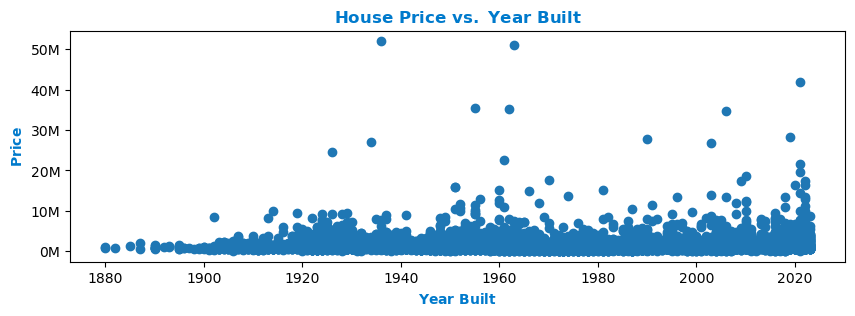

In [61]:

# Define a function to format y-axis ticks in millions
def millions_formatter(x, pos):
    return f'{int(x/1e6)}M'

plt.figure(figsize=(10, 3))
plt.scatter(df['Year Built'], df['Price'])
# Customize the labels and titles
plt.xlabel(r'$\bf{Year\ Built}$', color='#007acc')  # Set the x-axis label in bold and with a shade of blue
plt.ylabel(r'$\bf{Price}$', color='#007acc')  # Set the y-axis label in bold and with a shade of blue
plt.title(r'$\bf{House\ Price\ vs.\ Year\ Built}$', color='#007acc')  # Set the title in bold and with a shade of blue

# Format y-axis ticks as millions
formatter = mticker.FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">House Price By Neighborhood</span>
</div>

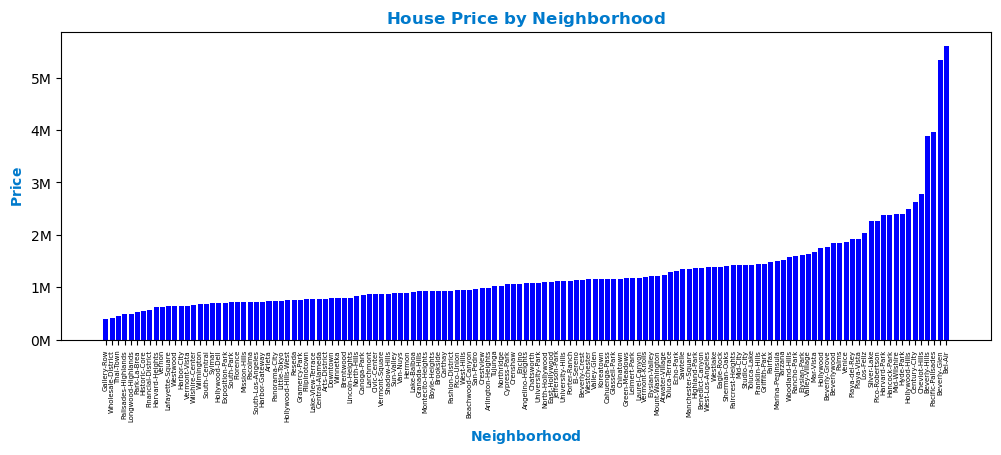

In [6]:
# Calculate the average price for each neighborhood
neighborhood_avg_price = df.groupby('Neighborhood')['Price'].mean()
neighborhood_avg_price_sorted = neighborhood_avg_price.sort_values()

# Define a function to format y-axis ticks in millions
def millions_formatter(x, pos):
    return f'{int(x/1e6)}M'

plt.figure(figsize=(12, 4))
plt.bar(neighborhood_avg_price_sorted.index, neighborhood_avg_price_sorted, color='blue')

# Customize the labels and title
plt.xlabel(r'$\bf{Neighborhood}$', color='#007acc')  # Set the x-axis label in bold and with a shade of blue
plt.ylabel(r'$\bf{Price}$', color='#007acc')  # Set the y-axis label in bold and with a shade of blue
plt.title(r'$\bf{House\ Price\ by\ Neighborhood}$', color='#007acc')  # Set the title in bold and with a shade of blue

# Format y-axis ticks as millions
formatter = mticker.FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=90)
plt.xticks(fontsize=5)
plt.show()


<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">Word-Cloud</span>
</div>

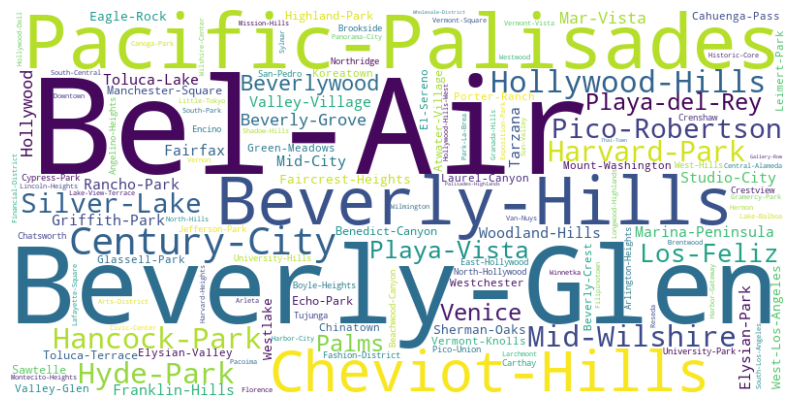

In [18]:
# Calculate the average price for each neighborhood
neighborhood_avg_price = df.groupby('Neighborhood')['Price'].mean()
# Generate word cloud from average prices
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(neighborhood_avg_price)
# Create a new figure for the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# Show the word cloud
plt.show()


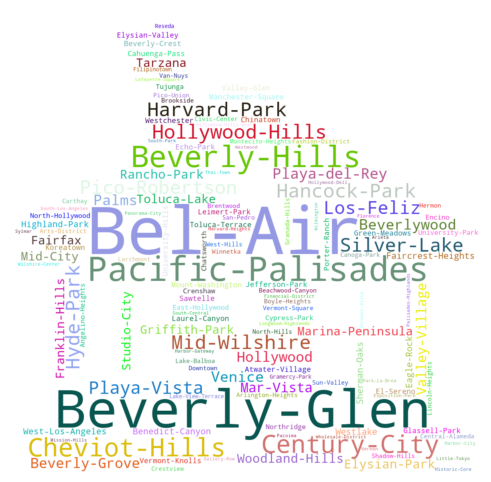

In [128]:

# Create a custom coloring function to generate random colors
def color_func(word, font_size, position, orientation, random_state, font_path):
    # Generate random RGB values for each word
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    
    return f'rgb({r}, {g}, {b})'

# Calculate the average price for each neighborhood
neighborhood_avg_price = df.groupby('Neighborhood')['Price'].mean()

# Generate word cloud from average prices
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(neighborhood_avg_price)

# Load the house image as a mask
house_mask = np.array(Image.open('R.jpeg'))

# Generate the word cloud with the custom shape and coloring
wordcloud_masked = WordCloud(width=800, height=400, background_color='White', mask=house_mask, color_func=color_func).generate_from_frequencies(neighborhood_avg_price)

# Plot the word cloud with the custom shape and coloring
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_masked, interpolation='bilinear')
plt.axis('off')

plt.show()



<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">Relationship between Rooms ,Baths and price</span>
</div>

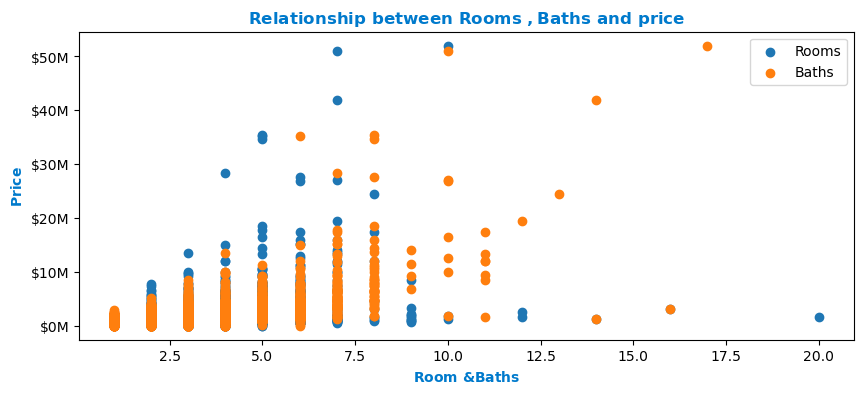

In [104]:
# Filter the data to exclude NaN values in 'Rooms' and 'Baths'
valid_data = df[(~df['Rooms'].isna()) & (~df['Baths'].isna())]

# Extract the relevant columns from the filtered data
room_tax = valid_data['Rooms']
bath_tax = valid_data['Baths']
price = valid_data['Price']

# Create a scatter plot
plt.figure(figsize=(10, 4))
plt.scatter(room_tax, price, label='Rooms')
plt.scatter(bath_tax, price, label='Baths')

plt.xlabel(r'$\bf{Room\ & Baths}$', color='#007acc')  # Set the x-axis label in bold and with a shade of blue
plt.ylabel(r'$\bf{Price}$', color='#007acc')  # Set the y-axis label in bold and with a shade of blue
plt.title(r'$\bf{Relationship\ between\ Rooms\ ,Baths\ and\ price}$', color='#007acc')  # Set the title in bold and with a shade of blue

# Format y-axis ticks as millions
formatter = mticker.FuncFormatter(lambda x, pos: f'${int(x/1e6)}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
plt.show()


<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">The most 10 expensive houses</span>
</div>

In [15]:
import folium
from geopy.geocoders import Nominatim

# Define a function to geocode an address and return its latitude and longitude
def geocode_address(address):
    geolocator = Nominatim(user_agent="my-app")
    location = geolocator.geocode(address)
    if location is not None:
        return location.latitude, location.longitude
    else:
        return None, None

# Sort the data by price in descending order and select the top 10 expensive neighborhoods
top_10_expensive = df.nlargest(10, 'Price')  # Replace 'df' with your DataFrame containing the addresses and prices

# Create a map centered around Los Angeles
la_map = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# Iterate over the top 10 expensive neighborhoods and plot points on the map
for index, row in top_10_expensive.iterrows():
    address = row['Adress']
    neighborhood = row['Neighborhood']
    price = row['Price']
    
    # Geocode the address to get latitude and longitude
    latitude, longitude = geocode_address(address)
    
    if latitude is not None and longitude is not None:
        # Create a marker for each point and assign a color based on the neighborhood
        marker_color = 'blue' if neighborhood == 'Neighborhood A' else 'red'  # Modify color mapping based on your neighborhood names
        
        # Create the popup content with address and price
        popup_content = f"Address: {address}<br>Price: {price}"
        
        folium.Marker([latitude, longitude], popup=popup_content, icon=folium.Icon(color=marker_color)).add_to(la_map)

# Display the map
la_map


<div style="display:flex; justify-content:flex-start">
    <span style="color:#003399; font-size:28px; font-family:ASSISTANT; padding: 5px;">Number of Apartments by Neighborhood</span>
</div>

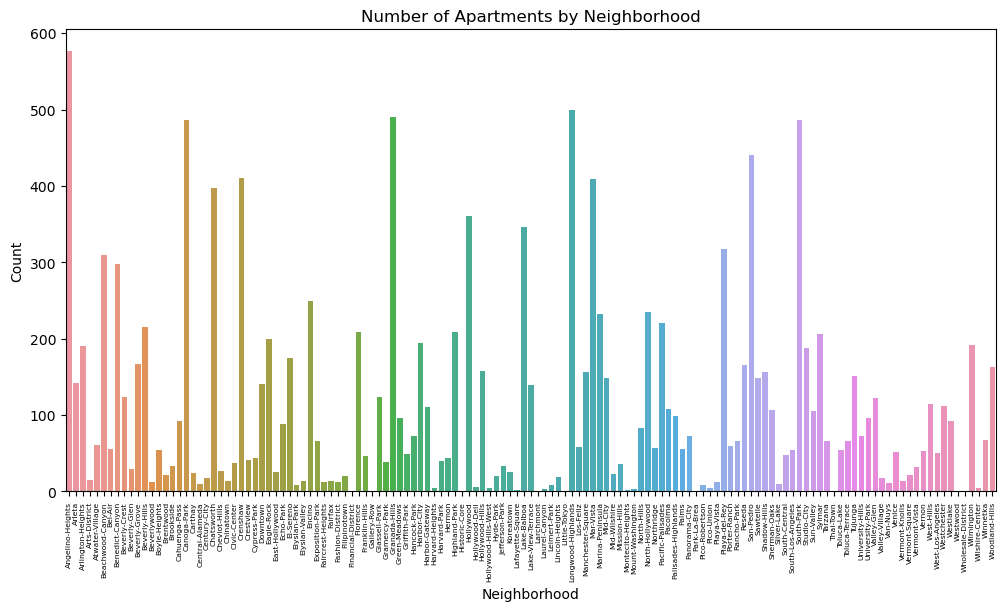

In [179]:

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Neighborhood')
plt.xlabel('Neighborhood', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Number of Apartments by Neighborhood', fontsize=12)
plt.xticks(rotation=90, fontsize=5.5)
plt.show()

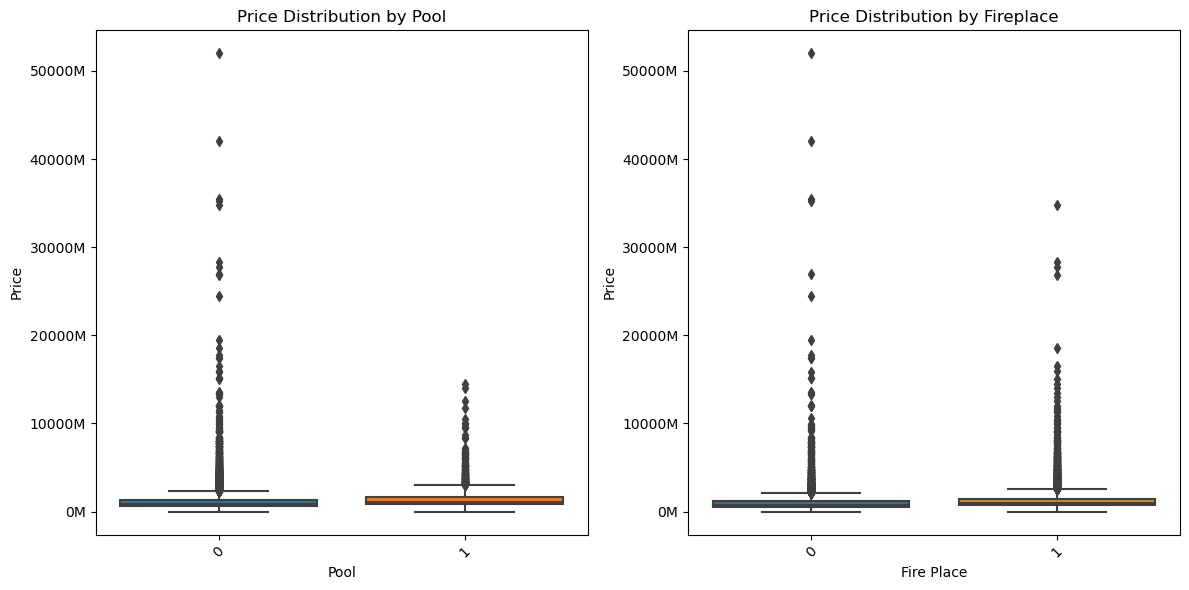

In [201]:


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Pool', y='Price')
plt.xlabel('Pool')
plt.ylabel('Price')
plt.title('Price Distribution by Pool')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x/1000)))
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Fire Place', y='Price')
plt.xlabel('Fire Place')
plt.ylabel('Price')
plt.title('Price Distribution by Fireplace')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'format(x/1000)))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


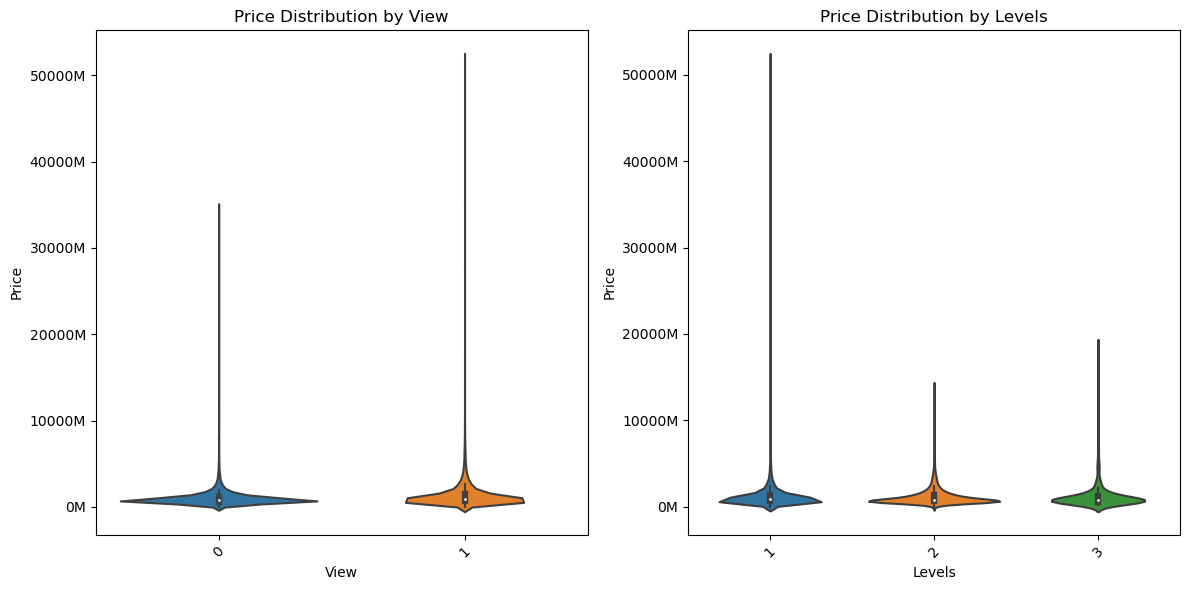

In [204]:

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(data=df, x='View', y='Price')
plt.xlabel('View')
plt.ylabel('Price')
plt.title('Price Distribution by View')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x/1000)))
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.violinplot(data=df, x='Levels', y='Price')
plt.xlabel('Levels')
plt.ylabel('Price')
plt.title('Price Distribution by Levels')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}M'.format(x/1000)))
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [90]:
df

,Neighborhood,Adress,Apartment,House,Price,Rooms,Baths,Sq Ft,Sq Ft Lot,Year Built,View,Fire Place,Levels,Attached Garage,Total Parking Space,Pool
0,Angelino-Heights,1037 Buena Vista St,0,1,3175000.0,3.0,2.0,2022.0,15681.6,1949.0,0,1,2,1,5.0,1
1,Angelino-Heights,3526 Lowell Ave,0,1,868000.0,3.0,2.0,1564.0,5227.0,1938.0,1,1,1,0,0.0,0
2,Angelino-Heights,713 Harding Ave,0,1,690000.0,2.0,1.0,770.0,5663.0,1954.0,1,1,1,0,2.0,0
3,Angelino-Heights,2167 Broadview Ter,0,1,1344000.0,3.0,3.0,1497.0,2614.0,1941.0,1,0,3,0,2.0,0
4,Angelino-Heights,2229 W 78th St,0,1,890000.0,3.0,2.0,1625.0,6534.0,1925.0,1,1,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15955,Woodland-Hills,27353 Park Vista Rd,0,1,1550000.0,5.0,3.0,3244.0,7841.0,NaN,1,1,1,0,3.0,0
15956,Woodland-Hills,24703 Avenida Asoleada,0,1,2650000.0,5.0,4.0,3233.0,10019.0,1987.0,1,1,2,1,3.0,1
15957,Woodland-Hills,4004 Black Bird Way,0,1,1579000.0,4.0,4.0,3422.0,5663.0,1989.0,1,1,2,1,3.0,0
15958,Woodland-Hills,23611 Ladrillo St,0,1,1265000.0,4.0,3.0,2436.0,11325.6,1961.0,0,1,1,1,2.0,1


# Removing all rows with NaN's that we couldn't map to procced with ML

In [122]:
df.dropna(inplace=True)
df = df.reset_index(drop=True)
print(df.isna().sum())

Neighborhood           0
Adress                 0
Apartment              0
House                  0
Price                  0
Rooms                  0
Baths                  0
Sq Ft                  0
Sq Ft Lot              0
Year Built             0
View                   0
Fire Place             0
Levels                 0
Attached Garage        0
Total Parking Space    0
Pool                   0
dtype: int64


# Machine Learning:
---

C:\Users\leana\AppData\Local\Temp\ipykernel_23936\2285200442.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df2.hist(ax=ax, figsize=(10,40))


array([[<AxesSubplot:title={'center':'Apartment'}>,
        <AxesSubplot:title={'center':'House'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Rooms'}>],
       [<AxesSubplot:title={'center':'Baths'}>,
        <AxesSubplot:title={'center':'Sq Ft'}>,
        <AxesSubplot:title={'center':'Sq Ft Lot'}>,
        <AxesSubplot:title={'center':'Year Built'}>],
       [<AxesSubplot:title={'center':'View'}>,
        <AxesSubplot:title={'center':'Fire Place'}>,
        <AxesSubplot:title={'center':'Levels'}>,
        <AxesSubplot:title={'center':'Attached Garage'}>],
       [<AxesSubplot:title={'center':'Total Parking Space'}>,
        <AxesSubplot:title={'center':'Pool'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

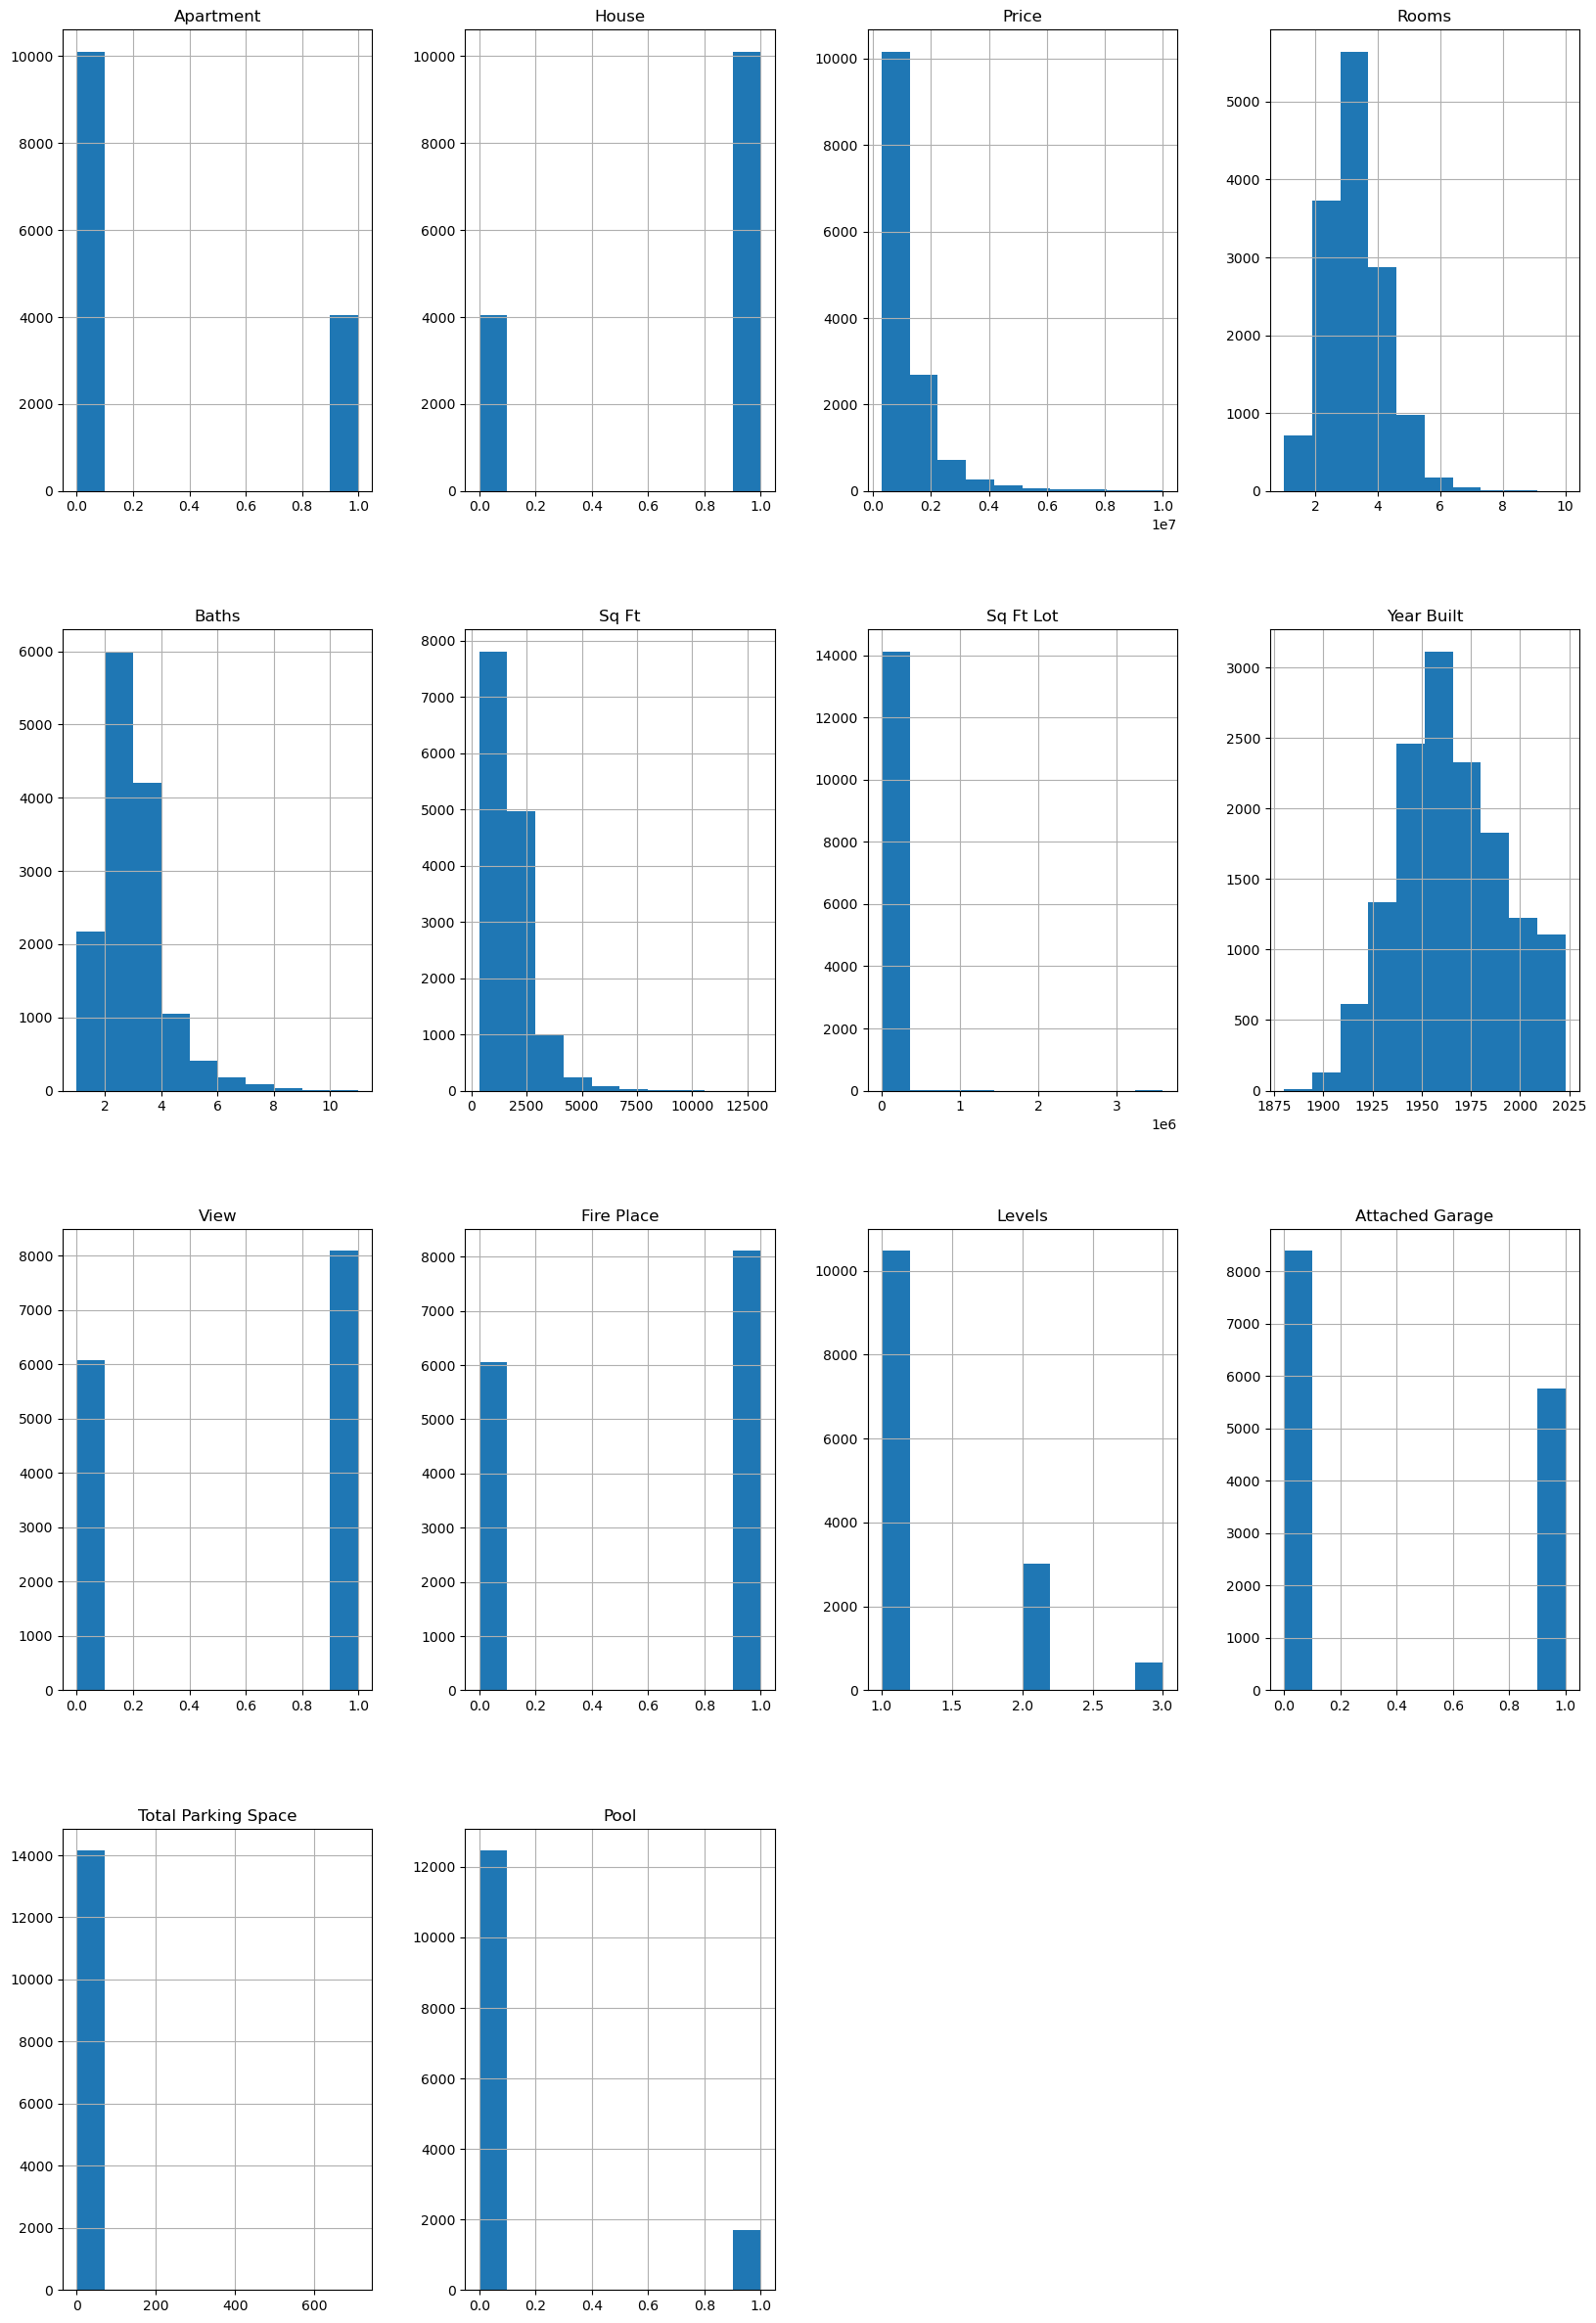

In [211]:
fig, ax = plt.subplots(figsize=(20,30))
df2.hist(ax=ax, figsize=(10,40))

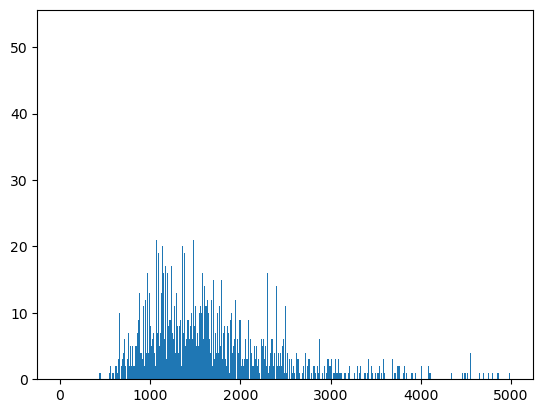

In [68]:
bins = []
for i in range (1,5000,1):
    bins.append(i)

plt.hist(df['Sq Ft'], bins)
plt.show()

In [140]:
df2 = df.copy()

In [124]:
df2

,Neighborhood,Adress,Apartment,House,Price,Rooms,Baths,Sq Ft,Sq Ft Lot,Year Built,View,Fire Place,Levels,Attached Garage,Total Parking Space,Pool
0,Angelino-Heights,1037 Buena Vista St,0,1,3175000.0,3.0,2.0,2022.0,15681.6,1949.0,0,1,2,1,5.0,1
1,Angelino-Heights,3526 Lowell Ave,0,1,868000.0,3.0,2.0,1564.0,5227.0,1938.0,1,1,1,0,0.0,0
2,Angelino-Heights,713 Harding Ave,0,1,690000.0,2.0,1.0,770.0,5663.0,1954.0,1,1,1,0,2.0,0
3,Angelino-Heights,2167 Broadview Ter,0,1,1344000.0,3.0,3.0,1497.0,2614.0,1941.0,1,0,3,0,2.0,0
4,Angelino-Heights,2229 W 78th St,0,1,890000.0,3.0,2.0,1625.0,6534.0,1925.0,1,1,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14496,Woodland-Hills,23390 Ostronic Dr,0,1,999000.0,2.0,2.0,1285.0,17859.6,1951.0,0,1,1,0,4.0,1
14497,Woodland-Hills,21520 Velicata St,0,1,2020000.0,4.0,4.0,2411.0,14810.4,1949.0,1,1,1,0,0.0,1
14498,Woodland-Hills,24703 Avenida Asoleada,0,1,2650000.0,5.0,4.0,3233.0,10019.0,1987.0,1,1,2,1,3.0,1
14499,Woodland-Hills,4004 Black Bird Way,0,1,1579000.0,4.0,4.0,3422.0,5663.0,1989.0,1,1,2,1,3.0,0


In [141]:
df2 = df2[(df2['Rooms'] >=1) & (df2['Rooms'] <= 13)]
df2 = df2[(df2['Price'] >= 300000) & (df2['Price'] <= 10000000)]
#df2 = df2[(df2['Baths'] >= 0) & (df2['Baths'] <= 10)]



df2 = df2.reset_index(drop=True)


In [142]:
# Linear regression

X = df2[['House', 'Apartment','Rooms', 'Baths', 'Sq Ft', 'Sq Ft Lot', 'Year Built', 'View', 'Fire Place', 'Levels', 'Attached Garage', 'Total Parking Space', 'Pool']]
y = df2['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
y_pred = regression_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('RMSE:', rmse)
print("R-squared Score:", r2)



RMSE: 561871.8842807102
R-squared Score: 0.6606614959650309


In [ ]:
R-squared Score: 0.6421184466573924


In [143]:
# Random Forest

X = df2[['House', 'Apartment','Rooms', 'Baths', 'Sq Ft', 'Sq Ft Lot', 'Year Built', 'View', 'Fire Place', 'Levels', 'Attached Garage', 'Total Parking Space', 'Pool']]
y = df2['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print('RMSE:', rmse)
print("R-squared Score:", r2)


RMSE: 541048.0018669385
R-squared Score: 0.6853482624718213


In [ ]:
R-squared Score: 0.7162026191397255


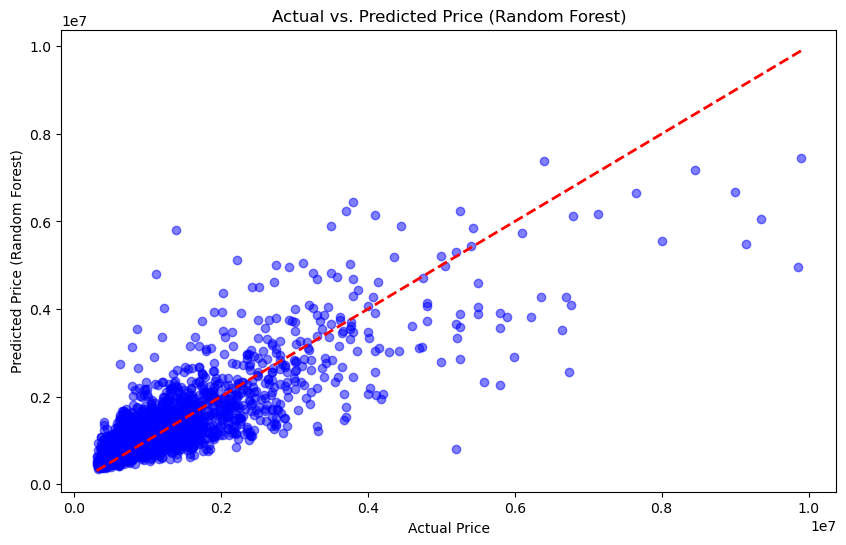

In [212]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (Random Forest)')
plt.title('Actual vs. Predicted Price (Random Forest)')
plt.show()


In [213]:
predictDF = pd.DataFrame({
    "Actual Price": y_test,
    "Predicted Price": y_pred,
    'House': X_test['House'],
    'Apartment': X_test['Apartment'],
    'Sq Ft': X_test['Sq Ft'],
    'Sq Ft Lot': X_test['Sq Ft Lot'],
    'Baths': X_test['Baths'],
    'Pool': X_test['Pool'],
    'Rooms': X_test['Rooms'],
    'Total Parking Space': X_test['Total Parking Space'],
    'Attached Garage': X_test['Attached Garage'],
    'Fire Place': X_test['Fire Place'],
    'View': X_test['View'],
    'Levels': X_test['Levels'],
    'Year Built': X_test['Year Built']
})

predictDF["Diff"] = np.abs(predictDF["Actual Price"] - predictDF["Predicted Price"])
neighborhood_df = df2.loc[X_test.index, 'Neighborhood']
predictDF['Neighborhood'] = neighborhood_df.values
predictDF = predictDF.sort_values(by='Diff', ascending=True)
pd.set_option('display.float_format', '{:.2f}'.format)


In [214]:
predictD

,Actual Price,Predicted Price,House,Apartment,Sq Ft,Sq Ft Lot,Baths,Pool,Rooms,Total Parking Space,Attached Garage,Fire Place,View,Levels,Year Built,Diff,Neighborhood
11575,780000.00,779870.00,1,0,2973.00,9583.00,3.00,0,4.00,3.00,1,1,0,2,2001.00,130.00,South-Park
13072,615000.00,614861.00,0,1,1291.00,1291.00,3.00,0,2.00,2.00,1,1,1,3,1986.00,139.00,Valley-Glen
4238,975000.00,975142.33,1,0,1385.00,6534.00,1.00,0,2.00,1.00,0,0,1,1,1909.00,142.33,Echo-Park
10269,442500.00,442688.83,0,1,700.00,700.00,1.00,0,1.00,1.00,0,0,1,1,1966.00,188.83,Playa-del-Rey
1530,645000.00,644684.97,1,0,665.00,2178.00,1.00,0,1.00,1.00,0,0,1,1,1950.00,315.03,Benedict-Canyon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11051,1120000.00,4810287.89,1,0,4923.00,4792.00,6.00,0,9.00,4.00,1,0,1,2,2017.00,3690287.89,San-Pedro
2034,6737250.00,2560399.06,1,0,4261.00,17859.60,5.00,1,5.00,3.00,1,1,1,1,1964.00,4176850.94,Beverly-Hills
8873,5200000.00,804025.00,1,0,1510.00,6098.00,2.00,0,3.00,2.00,1,1,1,1,1954.00,4395975.00,Marina-Peninsula
3013,1390000.00,5808896.03,1,0,4320.00,22215.60,5.00,0,6.00,0.00,0,1,0,1,1955.00,4418896.03,Chatsworth


In [215]:
columns = ["Rooms", "Baths", "Sq Ft", "Sq Ft Lot", "Year Built", "View", "Fire Place",
           "Levels", "Attached Garage", "Total Parking Space", "Pool"]

correlation_matrix = predictDF[columns + ["Diff"]].corr()
correlation_diff_sorted = correlation_matrix['Diff'].abs().sort_values(ascending=False)
correlation_matrix_sorted = correlation_matrix.reindex(correlation_diff_sorted.index)

correlation_matrix_sorted


,Rooms,Baths,Sq Ft,Sq Ft Lot,Year Built,View,Fire Place,Levels,Attached Garage,Total Parking Space,Pool,Diff
Diff,0.34,0.42,0.55,0.02,0.00,0.09,0.06,-0.00,-0.06,-0.02,0.09,1.00
Sq Ft,0.72,0.81,1.00,0.06,0.19,0.14,0.23,0.19,0.16,0.03,0.28,0.55
Baths,0.64,1.00,0.81,0.05,0.35,0.15,0.19,0.30,0.17,0.02,0.21,0.42
Rooms,1.00,0.64,0.72,0.05,0.04,0.01,0.20,0.13,0.22,0.05,0.25,0.34
View,0.01,0.15,0.14,0.03,0.20,1.00,0.05,0.11,0.06,-0.02,0.03,0.09
Pool,0.25,0.21,0.28,0.01,0.02,0.03,0.23,0.07,0.26,0.04,1.00,0.09
Fire Place,0.20,0.19,0.23,0.03,0.08,0.05,1.00,0.14,0.29,0.06,0.23,0.06
Attached Garage,0.22,0.17,0.16,0.01,0.29,0.06,0.29,0.39,1.00,0.10,0.26,-0.06
Sq Ft Lot,0.05,0.05,0.06,1.00,0.04,0.03,0.03,0.03,0.01,0.01,0.01,0.02
Total Parking Space,0.05,0.02,0.03,0.01,0.02,-0.02,0.06,0.07,0.10,1.00,0.04,-0.02


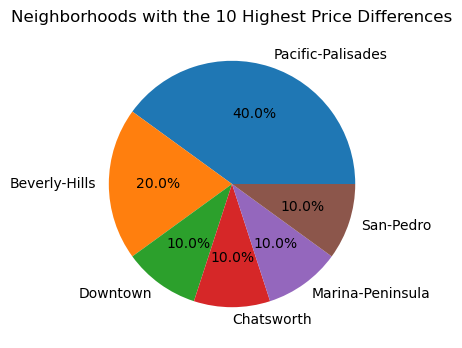

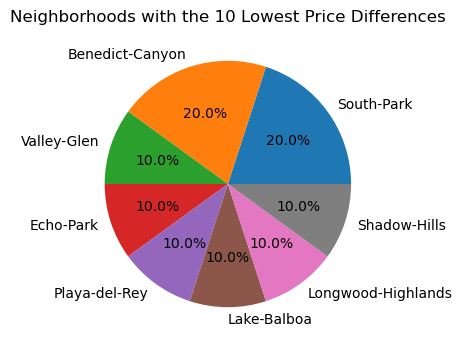

In [218]:
# Neighborhoods with the 10 highest price differences
top_10_high_diff = predictDF.nlargest(10, 'Diff')['Neighborhood'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(top_10_high_diff, labels=top_10_high_diff.index, autopct='%1.1f%%')
plt.title("Neighborhoods with the 10 Highest Price Differences")
plt.show()

# Neighborhoods with the 10 lowest price differences
top_10_low_diff = predictDF.nsmallest(10, 'Diff')['Neighborhood'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(top_10_low_diff, labels=top_10_low_diff.index, autopct='%1.1f%%')
plt.title("Neighborhoods with the 10 Lowest Price Differences")
plt.show()
